## Creating Your First Neural Network with Keras

We are going to use Tensorflow for our backend. 

The Tensorflow distribution has a built-in implementation of the Keras library. We will have close integration with Tensorflow to the point that Keras will use Tensorflow tensors as the main data structure. 


![Keras Installation](Images/02_01.jpg) 

The Tensorflow distribution has a built-in implementation of the Keras library. That will have close integration with Tensorflow to the point that Keras will use Tensorflow tensors as the main data structure. 

We will be using standalone Keras installation because that will give us more flexibility as to what backend we will use.

-----------

### Installing Tensorflow

Installed tensorflow-gpu

In [1]:
# To verify that Tensorflow is working
import tensorflow as tf

# Print version
print("Tensorflow version is: " + str(tf.__version__))

# Verify session works
hello = tf.constant('Hello from TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Tensorflow version is: 1.5.0
b'Hello from TensorFlow!'


### Installing Keras

Installed Keras

In [2]:
# Keras imports
import numpy as np
from keras import backend as kbe

# Test Keras - backend interaction
data = kbe.variable(np.random.random((4, 2)))  # Creates a 4x2 tensor of random numbers
zero_data = kbe.zeros_like(data)  # Creates a 4x2 tensor of zeros
print(kbe.eval(zero_data))  # Evaluates the zero_data and prints results

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Using TensorFlow backend.


-----

### Creating a Neural Network

Creating a model using Keras which will define the optimal separation line between two data clusters.

![Keras Installation](Images/02_02.jpg) 


---------

### Imports

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

### Helper Functions
#### Plotting the data on a figure

In [4]:
def plot_data(pl, X, y):
    
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

#### Common function that draws the decision boundaries

In [5]:
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))

    # plot the contour rather than just the line
    # allows us to see the confidence of the prediction
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)

    # plot the moons of data
    plot_data(plt, X, y)

    return plt

### Generating the Data Blobs

Data will be either 0 or 1 when 2 is number of centers.

X is a [ number of samples, 2 ] sized array. X [ sample ] contains its x, y position of the sample in the space.

ex: X [ 1 ] = [ 1.342, -2.3 ],  X [ 2 ] = [ -4.342, 2.12 ]

y is a [ number of samples ] sized array. y [ sample ] contains the class index (i.e., 0 or 1 when there are two centers).

ex: y [ 1 ] = 0, y [ 1 ] = 1

In [6]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

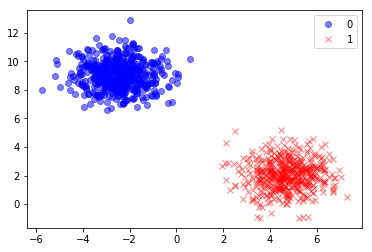

In [7]:
pl = plot_data(plt, X, y)
pl.show()

Clusters look easily separable, so we do not need a complex network to find a boundary to separate the two. In general, any data distribution that is linearly separable can be done without needing any hidden layers in our neural network. 

### Splitting the Dataset into Training and Testing

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating the Keras Model

In the Dense layer, every neuron is connected to every neuron in the following layer, or to the output if there isn't a following layer. 

The Adam optimizer will perform back propagation to adjust the weights and biases to minimize error during training. 

The general patter for the sequential model:
- Create Model
- Add Layers from input to output
- Compile Model
- Train Model (via fit)
- Evaluate performance of model against the testing/validation set


#### Simple Sequential Model:


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

Adds a Dense Fully Connected Layer with 1 neuron. Using input_shape = (2,) says the input will be arrays of the form (*,2). 

The first dimension will be an unspecified number of batches (rows) of data. The second dimension is 2 which are the X, Y positions of each data element.

The sigmoid activation function is used to return 0 or 1, signifying the data cluster the position is predicted to belong to.